In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image, ImageFilter

DATADIR = "/home/dariel/Escritorio/git/ML_HectorS_2021/Mascaras/Modelo" #Directorio en el que se encuentra nuestros datos
CATEGORIES = ["Humano", "NoHumano"] #Nombres de las carpetas que contienen los datos de entrenamiento previamente clasificados

#Importamos los paquetes necesarios para preparar los datos y definimos las categorias con las que vamos a trabajar y el directorio que las contiene 
#nota, la función no correra a menos que se coloquen los directorios y las categorias correspondientes

In [2]:
IMG_SIZE = 64 #Este sera el tamaño por defecto de nuestra imagen
filtro = 3 #Parametro necesario para eliminar el ruido de las imagenes
training_data = [] #Creamos un conjunto vacio para nuestra prueba

#Definimos la función para crear nuestros datos
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join (DATADIR, category) #escogemos los datos dentro de las categorias que seleccionamos
        class_num = CATEGORIES.index(category) #Sustituimos las categorias por valores numericos
        for img in os.listdir(path):
            try:
                img_array = cv2.imread (os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #convertimos nuestra imagen en un arreglo y lo pasamos a blanco y negro
                new_array = cv2.medianBlur(img_array,filtro) #aplicamos un filtro para eliminar el ruido de la imagen
                new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE)) #cambiamos el tamaño de nuestra imagen
                training_data.append([new_array, class_num])#Creamos nuestros datos de entrenamiento con los arreglos y su correspondiente categoria
            except Exception as e:#descartamos los datos que den error
                pass

create_training_data() #corremos la función


[array([[169, 175, 181, ..., 240, 239, 236],
       [176, 184, 189, ..., 239, 240, 239],
       [178, 183, 190, ..., 241, 241, 238],
       ...,
       [104,  82,  59, ..., 167, 182, 177],
       [101,  91,  64, ..., 175, 170, 180],
       [112, 100,  59, ..., 174, 177, 178]], dtype=uint8), 0]


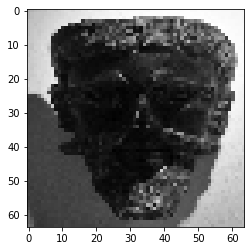

[array([[29, 24, 25, ..., 24, 23, 22],
       [24, 22, 27, ..., 28, 23, 22],
       [20, 20, 25, ..., 25, 26, 22],
       ...,
       [38, 36, 32, ..., 65, 55, 49],
       [41, 38, 33, ..., 67, 70, 71],
       [49, 40, 38, ..., 63, 63, 62]], dtype=uint8), 0]


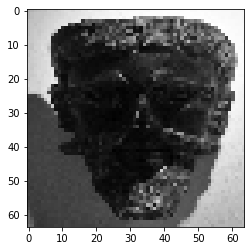

In [3]:
print(training_data[0])
plt.imshow(training_data[0][0], cmap = 'gray')
plt.show()
print(training_data[130])
plt.imshow(training_data[0][0], cmap = 'gray')
plt.show()

In [4]:
import random #ya que los datos estan ordenados por carpeta los reordenamos de manera aleatoria
random.shuffle(training_data)

In [5]:
X = [] #creamos nuestros conjuntos de entrenamiento
y = []

for features, label in training_data:
    X.append(features) #X corresponde a los arreglos
    y.append(label) # y corresponde a su categoria

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #Cambiamos la forma de nuestrso datos para el futuro entrenamiento
y = np.array(y)

In [6]:
import pickle #usamos la función pickle para guardar nuestros datos en el almacenamiento y poderlos usar directamente

pickle_out = open("X.pic","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pic","wb")
pickle.dump(y, pickle_out)
pickle_out.close()